In [191]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(threshold=np.nan)

In [2387]:
SPEED = 1.4
LENGTH = 1.5


In [2494]:
class link:
    def __init__(self, inp_state, inp_index):
        self.state = inp_state
        self.index = inp_index
        

In [3]:
def rad_to_deg(delta):
    return delta * 180 / math.pi

In [4]:
def deg_to_rad(delta):
    return delta * math.pi/180

In [916]:
class state:

    def __init__(self, x, y, theta, g,f, steer):
        self.x = x
        self.y = y
        self.theta = theta
        self.g = g
        self.f = f
        self.steer = steer


In [2390]:
def normalize(theta):
    if theta < 0:    
        theta = theta + 2.0 * math.pi
        return theta
    if theta > 2*np.pi:    
        theta = theta - 2.0 * math.pi
        return theta
    else:
        return theta 

In [2227]:
def heuristic(x,y,goal):
    distance  = math.sqrt( ((x-goal.x)**2) + ((y-goal.y)**2) )
    return distance

In [739]:
def expand(v_state, goal):
    next_states = []
    for delta in range(-35, 40, 5): 
        # Create a trajectory with delta as the steering angle using the bicycle model:

        # ---Begin bicycle model---
        delta_rad = deg_to_rad(delta)
        omega = SPEED/LENGTH * delta_rad
        
        d_x = SPEED * math.cos(v_state.theta)
        d_y = SPEED * math.sin(v_state.theta)
        next_x = v_state.x + d_x
        next_y = v_state.y + d_y
        next_theta = normalize(v_state.theta + (omega))
        
        # ---End bicycle model-----
        next_g = v_state.g + np.sqrt( d_x * d_x +  d_y * d_y )
        next_f = next_g + heuristic(next_x, next_y, goal)

        # Create a new State object with all of the "next" values.
        new_state = state(next_x, next_y, next_theta, next_g, next_f)
        next_states.append(new_state)

    return next_states

In [2391]:
def transition(v_state, delta, dt, goal):
   
    # ---Begin bicycle model---
    #delta_rad = deg_to_rad(delta)
    omega = SPEED/LENGTH * math.tan(delta)
    
    
    d_x = SPEED * math.cos(v_state.theta) * dt
    d_y = SPEED * math.sin(v_state.theta) * dt
    
    next_x = v_state.x + d_x
    next_y = v_state.y + d_y
    next_theta = normalize(v_state.theta + (omega*dt)) 

    # ---End bicycle model-----
    next_g = v_state.g + np.sqrt( d_x * d_x +  d_y * d_y )
    next_f = next_g+heuristic(next_x, next_y, goal)
    next_steer = delta

    # Create a new State object with all of the "next" values.
    new_state = state(next_x, next_y, next_theta, next_g, next_f, next_steer)

    return new_state

In [1899]:
w = np.array([[1, 0],[-1,0]])

In [1900]:
vehicle_points = np.array([[-1.1, 2],[0, 2],[1.1, 2],[-1.1, 0],[0, 0],[1.1,0],[-1.1, -2],[0, -2],[1.1, -2]])

In [15]:
def rotation(w,t):
    y = np.array([[math.cos(t), math.sin(t)], [-math.sin(t), math.cos(t)]])
    return np.matmul(w, y)
    

In [16]:
def transformation(w, x, y,t):
    p = np.zeros_like(w)
    for i in range(p.shape[0]):
        p[i][0:2] = w[i][0:2]+[x,y]
        
    return rotation(p,(t-np.pi/2))
    
    

In [1359]:
transformation(vehicle_points, 1.0, 0.0, np.pi/2)

array([[-0.1,  2. ],
       [ 1. ,  2. ],
       [ 2.1,  2. ],
       [-0.1,  0. ],
       [ 1. ,  0. ],
       [ 2.1,  0. ],
       [-0.1, -2. ],
       [ 1. , -2. ],
       [ 2.1, -2. ]])

In [20]:
print(rotation(vehicle_points, deg_to_rad(-90)))

[[  2.00000000e+00   1.10000000e+00]
 [  2.00000000e+00   1.22464680e-16]
 [  2.00000000e+00  -1.10000000e+00]
 [ -6.73555740e-17   1.10000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  6.73555740e-17  -1.10000000e+00]
 [ -2.00000000e+00   1.10000000e+00]
 [ -2.00000000e+00  -1.22464680e-16]
 [ -2.00000000e+00  -1.10000000e+00]]


In [793]:
grid_x_m = 20
grid_y_m = 20

coll_cell_side = 1
grid_coll_x = np.int( np.ceil(grid_x_m/coll_cell_side) )
grid_coll_y = np.int( np.ceil(grid_y_m/coll_cell_side) )

grid = np.zeros((grid_coll_x,grid_coll_y), np.int)

In [801]:
grid[9][0:18] = 1


In [802]:
print(grid)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [1361]:
cell_side = 1.0
x_offset = (grid.shape[1]*coll_cell_side)/2
y_offset = 0.0


In [1362]:
def get_grid_coordinates(x, y):
    x = x+x_offset
    y = y+y_offset
    cell_x = math.floor(x/cell_side)
    cell_y = math.floor(y/cell_side)
    #grid[cell_y, cell_x] = 2
    return cell_x, cell_y
    

In [1363]:
def check_occupancy(x, y):
    x = x+x_offset
    y = y+y_offset
    cell_x = math.floor(x/coll_cell_side)
    cell_y = math.floor(y/coll_cell_side)
    #grid[cell_y, cell_x] = 2
    return grid[cell_y, cell_x]
    

In [2151]:
def delta_t(delta, n, off):
    #delta = deg_to_rad(delta)#for convenient debugging
    #off = deg_to_rad(off)#for convenient debugging
    delta_list = []
    delta_list.append(delta)
    delta_calc = delta
    for i in range(0 ,n):
        delta_calc += off   
        if delta_calc < max_angle:
            delta_list.append(delta_calc)
        
    delta_calc = delta
    for i in range(0 ,n):
        delta_calc -= off
        if min_angle < delta_calc:
            delta_list.append(delta_calc)
        
    return delta_list

In [2310]:
def checkLimits( x,y ):
    
    result = True
    
    if  ( x < -grid_x_m/2 ) | \
        ( y < 0 ) | \
        ( x > grid_x_m/2 ) | \
        ( y > grid_y_m ):
        
        result = False
    
    return result

In [2317]:
max_angle = 0.785398
min_angle = -0.785398

In [2478]:
def check_closed(x, y, theta):
    x = x + x_state_offset
    y = y + y_state_offset
    
    cell_x = math.floor(x/state_cell_side)
    cell_y = math.floor(y/state_cell_side)
    
    cell_theta = math.floor( theta * NUM_THETA_CELLS / (2.0 * np.pi) )
    return closed[cell_theta][cell_y][cell_x]
    

In [2479]:
def set_closed(x, y, theta):
    x = x + x_state_offset
    y = y + y_state_offset
    
    cell_x = math.floor(x/state_cell_side)
    cell_y = math.floor(y/state_cell_side)
    
    cell_theta = math.floor( theta * NUM_THETA_CELLS / (2.0 * np.pi) )
    closed[cell_theta][cell_y][cell_x] = 1


In [2495]:
state_cell_side = 1
grid_state_x = np.int( np.ceil(grid_x_m/state_cell_side) )
grid_state_y = np.int( np.ceil(grid_y_m/state_cell_side) )

NUM_THETA_CELLS = 360
closed = [[[0 for x in range(grid_state_x)] for y in range(grid_state_y)] for cell in range(NUM_THETA_CELLS)]

x_state_offset = grid_x_m/2.0
y_state_offset = 0.0


In [2496]:
current_state = state(0.0, 2.1, np.pi/2, 0.0, 0.0, 0.0)
new_points = np.copy(vehicle_points)
#print(new_points)

Goal.x = 0.0
Goal.y = 18.0
    

In [2497]:
#print(current_state.x, current_state.y, current_state.theta)

path_state = current_state
open_list = []
path_link = link( path_state, 0 )
open_list.append( path_link )

trace_list = []
trace_link = link( path_state, -1 )
trace_list.append( trace_link )


path_x = []
path_y = []

path_x.append( current_state.x )
path_y.append( current_state.y )




goal


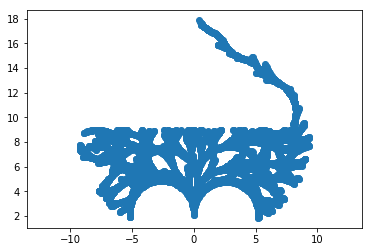

In [2498]:
goal_reached = 0

for count in range(2):
    while ( len(open_list) > 0 ) & (goal_reached == 0):

        open_list.sort( key=lambda ste:ste.state.f )

        path_link = open_list.pop(0)
        path_state = path_link.state
        path_index = path_link.index

       # print( "" )
        #print( "Best path")
        #print( path_state.x, path_state.y, path_state.theta, path_state.f )
        path_x.append( path_state.x )
        path_y.append( path_state.y )


        #exit = 0

        #while exit == 0:

        delta_angle = delta_t( path_state.steer, 5, deg_to_rad(5.0) )
        delta_angle = [ 30 * np.pi / 180, 20 * np.pi / 180, 0, -20 * np.pi / 180, -30 * np.pi / 180 ]

        #print( delta_angle )

        state_list = []

        for i in range(len(delta_angle)):
            
            new_state = transition( path_state, delta_angle[i], 0.1, Goal)
            
            #print( new_state.x, new_state.y, new_state.theta )
            if check_closed( new_state.x, new_state.y, new_state.theta ) == 0:
                if checkLimits( new_state.x , new_state.y ) == True:
                    state_list.append(new_state)
                    set_closed( new_state.x, new_state.y, new_state.theta )
                    
                    #print( new_state.x, new_state.y, new_state.steer )

        collision_free = []

        for i in range(len(state_list)):

            check = 0
            #new_points = transformation(vehicle_points, state_list[i].x, state_list[i].y, state_list[i].theta)
            new_points = [ [ state_list[i].x, state_list[i].y ] ]
            
            for point in new_points :
                if checkLimits(point[0],point[1]) == True:

                    get_x, get_y = get_grid_coordinates(point[0], point[1])
                    
                    check = check_occupancy(point[0], point[1])
                   
                else :
                    check =1

                if check == 1:
                
                   break

            if check == 0:
                collision_free.append(state_list[i])
                

        if( collision_free ):

            for nstate in collision_free:
                
                #print( nstate.x, nstate.y, nstate.theta )
                new_link = link( nstate, len(trace_list) )
                open_list.append( new_link )
                
                trace_link = link( nstate, path_index )
                trace_list.append( trace_link )
                          
                
                if np.sqrt((nstate.x - Goal.x)**2 + (nstate.y - Goal.y)**2) < 0.5:
                    goal_reached = 1
                    path_x.append( nstate.x )
                    path_y.append( nstate.y )
                    print( "goal")
                    


            #path_state = collision_free[0]

            #if checkLimits( path_state ) == True:
            #    path_x.append( path_state.x )
            #    path_y.append( path_state.y )

                #print( path_state.x, path_state.y )


    #print( "" )
    #print( "Ostates")
    #for ostate in open_list:

       # print( ostate.x, ostate.y, ostate.theta, ostate.f )

plt.scatter( path_x, path_y )
plt.axis('equal')
plt.show()
        
    
#print(current_state.x, current_state.y, current_state.theta)
#print(new_points)
#grid_v = np.copy(grid)

#    if check == 1:
#        break

#if check == 0:
#    print(grid_v)

#print(grid_v)

#plt.scatter(px,py)


















#plt.show()

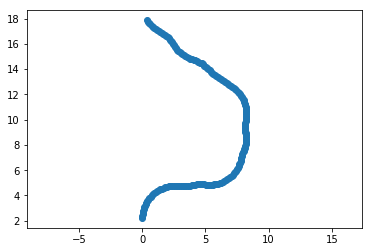

In [2499]:
if goal_reached == 1 :
        fpath_x = []
        fpath_y = []
        
        curr_trace = trace_list[-1]
        
        while( curr_trace.index != -1 ):
            fpath_x.append( curr_trace.state.x )
            fpath_y.append( curr_trace.state.y )
            
            curr_trace = trace_list[ curr_trace.index ]
            
plt.scatter( fpath_x, fpath_y )
plt.axis( 'equal' )
plt.show()
    

In [2477]:
print( math.floor( 6.277231820095903 * NUM_THETA_CELLS / np.pi ) )


719


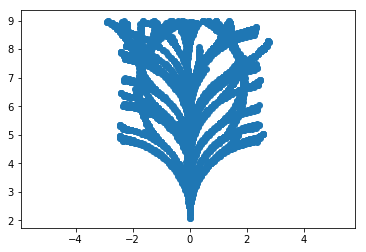

In [2472]:
plt.scatter( path_x, path_y )
plt.axis('equal')
plt.show()

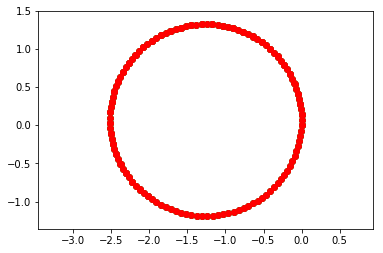

In [2461]:
steer = 50 * np.pi / 180
cstate = state( 0, 0, np.pi/2, 0, 0, steer )
px = [] 
py = []

px.append( cstate.x )
py.append( cstate.y )

for i in range(150):
    cstate = transition( cstate, steer, 0.1, Goal)
    px.append( cstate.x )
    py.append( cstate.y )
    
plt.scatter( px, py, c='green' )
#plt.show()
    
    
steer = 50 * np.pi / 180
cstate = state( 0, 0, np.pi/2, 0, 0, steer )
px = [] 
py = []

px.append( cstate.x )
py.append( cstate.y )

for i in range(150):
    cstate = transition_tan( cstate, steer, 0.1, Goal)
    px.append( cstate.x )
    py.append( cstate.y )
    
plt.scatter( px, py, c='red' )

plt.axis('equal')
plt.show()
    
    
    

In [2257]:
checkLimits(1.12514434592, 0.594684959317)

True

[[ 4.81600472 -0.31940363]
 [ 4.75204541 -1.4175426 ]
 [ 4.6880861  -2.51568158]
 [ 2.8193884  -0.20311397]
 [ 2.75542909 -1.30125294]
 [ 2.69146978 -2.39939192]
 [ 0.82277209 -0.08682431]
 [ 0.75881278 -1.18496329]
 [ 0.69485346 -2.28310226]]


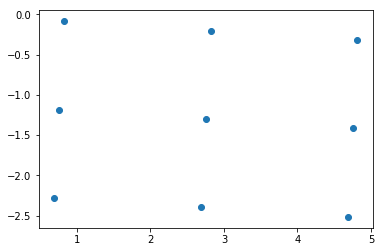

In [2004]:
print( new_points )
px = []
py = []
for i in range(len(new_points)):
    px.append( new_points[i][0] )
    py.append( new_points[i][1] )

plt.scatter(px,py)
plt.show()

In [2005]:
print(grid)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [1790]:
check_occupancy(0,10)

0

In [77]:
get_grid_coordinates(0, 10)

(10, 10)

In [803]:
print(grid)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [701]:
NUM_THETA_CELLS = 90

Takes an angle (in radians) and returns which "stack" in the 3D configuration space
this angle corresponds to. Angles near 0 go in the lower stacks while angles near 
2 * pi go in the higher stacks.

In [704]:
def theta_to_stack_number(theta):
  
    new_theta = math.fmod((theta + 2 * math.pi),(2 * math.pi))
    stack_number = (round(new_theta * NUM_THETA_CELLS / (2*math.pi))) % NUM_THETA_CELLS
    return stack_number


In [705]:
print(theta_to_stack_number(1))

14


In [706]:
def idx (n):
    return math.floor(n)
    

In [707]:
class start:

    def __init__(self, x, y, theta):
        self.x = x
        self.y = y
        self.theta = theta
        
class goal:

    def __init__(self, x, y):
        self.x = x
        self.y = y

In [828]:
deg_to_rad(90) == np.pi/2


True

In [862]:
angle = delta_t(10, 10, 5)
print(angle)
print(len(angle))

[0.17453292519943295, 0.2617993877991494, 0.3490658503988659, 0.4363323129985824, 0.5235987755982988, 0.6108652381980153, 0.6981317007977318, 0.7853981633974483, 0.8726646259971648, 0.9599310885968813, 1.0471975511965976, 0.08726646259971647, 0.0, -0.08726646259971647, -0.17453292519943295, -0.2617993877991494, -0.3490658503988659, -0.4363323129985824, -0.5235987755982988, -0.6108652381980153, -0.6981317007977318]
21


In [870]:
def search(grid, start, goal):
    # The opened array keeps track of the stack of States objects we are 
    # searching through.
    opened = []
    # 3D array of zeros with dimensions:
    # (NUM_THETA_CELLS, grid x size, grid y size).
    closed = [[[0 for x in range(len(grid[0]))] for y in range(len(grid))] for cell in range(NUM_THETA_CELLS)]
    # 3D array with same dimensions. Will be filled with State() objects to keep 
    # track of the path through the grid. 
    came_from = [[[0 for x in range(len(grid[0]))] for y in range(len(grid))] for cell in range(NUM_THETA_CELLS)]

    # Create new state object to start the search with.
    x = start.x
    y = start.y
    
    theta = start.theta
    g = 0
    f = heuristic(x, y, goal)
    ste = state(x, y, theta, 0, f)
    opened.append(ste)
    print("Reached")

    # The range from 0 to 2pi has been discretized into NUM_THETA_CELLS cells. 
    # Here, theta_to_stack_number returns the cell that theta belongs to. 
    # Smaller thetas (close to 0 when normalized  into the range from 0 to 2pi) 
    # have lower stack numbers, and larger thetas (close to 2pi whe normalized)
    # have larger stack numbers.
    stack_number = theta_to_stack_number(ste.theta)
    closed[stack_number][idx(ste.x)][idx(ste.y)] = 1
    print("Reached")

    # Store our starting state. For other states, we will store the previous state 
    # in the path, but the starting state has no previous.
    came_from[stack_number][idx(ste.x)][idx(ste.y)] = ste
    print("Reached")

    # While there are still states to explore:
    while opened:
        # Sort the states by f-value and start search using the state with the 
        # lowest f-value. This is crucial to the A* algorithm; the f-value 
        # improves search efficiency by indicating where to look first.
        opened.sort(key=lambda ste:ste.f)
        current = opened.pop(0)
        print(current.x , current.y, current.theta)
        print(len(opened))

        # Check if the x and y coordinates are in the same grid cell as the goal. 
        # (Note: The idx function returns the grid index for a given coordinate.)
        if (idx(current.x) == goal.x) and (idx(current.y) == goal.y):
            # If so, the trajectory has reached the goal.
            print(path)
            print("Reached")
            return path

        # Otherwise, expand the current state to get a list of possible next states.
        next_states = expand(current, goal)
        
        #print(len(next_states))
        for i in range(len(next_states)):
            
            print(next_states[i].f)
        for next_state in next_states:
            # If we have expanded outside the grid, skip this next_state.
            if next_states not in grid:
                continue
            # Otherwise, check that we haven't already visited this cell and
            # that there is not an obstacle in the grid there.
            stack_number = theta_to_stack_number(next_state.theta)
            print("Reached")
            if closed_value[stack_number][idx(next_state.x)][idx(next_state.y)] == 0 and grid[idx(next_state.x)][idx(next_state.y)] == 0:
                # The state can be added to the opened stack.
                opened.append(next_state)
                # The stack_number, idx(next_state.x), idx(next_state.y) tuple 
                # has now been visited, so it can be closed.
                closed[stack_number][idx(next_state.x)][idx(next_state.y)] = 1
                # The next_state came from the current state, and that is recorded.
                came_from[stack_number][idx(next_state.x)][idx(next_state.y)] = current

In [871]:
Start = start(0, 0, 0)
Goal = goal(0, 30)
search(grid, Start, Goal)

Reached
Reached
Reached
0 0 0
0
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254
31.032648900821254


/home/ros/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [768]:
print(grid)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [735]:
def search(grid, start, goal):
    # The opened array keeps track of the stack of States objects we are 
    # searching through.
    opened = []
    # 3D array of zeros with dimensions:
    # (NUM_THETA_CELLS, grid x size, grid y size).
    closed = [[[0 for x in range(len(grid[0]))] for y in range(len(grid))] for cell in range(NUM_THETA_CELLS)]
    # 3D array with same dimensions. Will be filled with State() objects to keep 
    # track of the path through the grid. 
    came_from = [[[0 for x in range(len(grid[0]))] for y in range(len(grid))] for cell in range(NUM_THETA_CELLS)]

    # Create new state object to start the search with.
    x = start.x
    y = start.y
    
    theta = start.theta
    g = 0
    f = heuristic(x, y, goal)
    v_state = state(x, y, theta, 0, f)
    opened.append(v_state)

    # The range from 0 to 2pi has been discretized into NUM_THETA_CELLS cells. 
    # Here, theta_to_stack_number returns the cell that theta belongs to. 
    # Smaller thetas (close to 0 when normalized  into the range from 0 to 2pi) 
    # have lower stack numbers, and larger thetas (close to 2pi whe normalized)
    # have larger stack numbers.
    stack_number = theta_to_stack_number(v_state.theta)
    closed[stack_number][idx(v_state.x)][idx(v_state.y)] = 1

    # Store our starting state. For other states, we will store the previous state 
    # in the path, but the starting state has no previous.
    came_from[stack_number][idx(v_state.x)][idx(v_state.y)] = state

    # While there are still states to explore:
    while opened:
        # Sort the states by f-value and start search using the state with the 
        # lowest f-value. This is crucial to the A* algorithm; the f-value 
        # improves search efficiency by indicating where to look first.
        opened.sort(key=lambda v_state:v_state.f)
        current = opened.pop(0)

        # Check if the x and y coordinates are in the same grid cell as the goal. 
        # (Note: The idx function returns the grid index for a given coordinate.)
        if (idx(current.x) == goal.x) and (idx(current.y) == goal.y):
            # If so, the trajectory has reached the goal.
            return path

        # Otherwise, expand the current state to get a list of possible next states.
        next_states = expand(current, goal)
        for next_state in next_states:
            # If we have expanded outside the grid, skip this next_state.
            if next_states not in grid:
                continue
            # Otherwise, check that we haven't already visited this cell and
            # that there is not an obstacle in the grid there.
            stack_number = theta_to_stack_number(next_state.theta)
            if closed_value[stack_number][idx(next_state.x)][idx(next_state.y)] == 0 and grid[idx(next_state.x)][idx(next_state.y)] == 0:
                # The state can be added to the opened stack.
                opened.append(next_state)
                # The stack_number, idx(next_state.x), idx(next_state.y) tuple 
                # has now been visited, so it can be closed.
                closed[stack_number][idx(next_state.x)][idx(next_state.y)] = 1
                # The next_state came from the current state, and that is recorded.
                came_from[stack_number][idx(next_state.x)][idx(next_state.y)] = current

In [769]:
Start = start(0, 10, 0)
Goal = goal(5, 30)
search(grid, Start, Goal)

Reached
Reached
Reached
Reached


/home/ros/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [715]:
x = np.array([[[5,6],[7, 8]],[[9, 10],[11, 12]]])